# Support Vector Machines from scratch

In [33]:
import os
import torch
import cvxopt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [34]:
X, y = make_blobs(n_samples=200, n_features=2, centers=2)

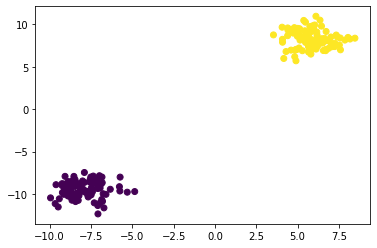

In [35]:
plt.scatter(X[:, 0], X[:, 1], c=y)

$$
    \large
    \max_{\boldsymbol{\sigma}; \boldsymbol{\sigma} \geq 0}  \sum_{i=1}^{N}\sigma_i - \frac{1}{2} \sum_{i=1}^{N}\sum_{j=1}^{N} \sigma_i \sigma_j y_i y_j \boldsymbol{x}_i^\top \boldsymbol{x}_j \\
    \large
    \min_{\boldsymbol{\sigma}; \boldsymbol{\sigma} \geq 0}  \frac{1}{2} \sum_{i=1}^{N}\sum_{j=1}^{N} \sigma_i \sigma_j y_i y_j \boldsymbol{x}_i^\top \boldsymbol{x}_j -  \sum_{i=1}^{N}\sigma_i  
$$


$$
\large
    P_{ij} = y_i y_j \boldsymbol{x}_i^\top\boldsymbol{x}_j
$$

$$
    \large
    \boldsymbol{w} = \sum_{i=1}^{N} y_i \sigma_i \boldsymbol{x}_i
$$

$$
    \large
    b = y_s - \sum_{m \in S} \sigma_m y_m \boldsymbol{x}_m^\top \boldsymbol{x}_s \\
    \text{where} \; S \; \text{is the set of support vectors such as} \; \sigma_i > 0
$$

- Compute $\boldsymbol{P}$.
- Compute $\boldsymbol{w}$.
- Find the support vectors $S$ by finding any data point where $\sigma_i > 0$.
- Compute $b$.
- To predict, compute $y_{test} = \text{sign}\left(\boldsymbol{w}^\top \boldsymbol{x}_{test} + b \right)$

CVXOPT form:
$$
    \min \frac{1}{2} \boldsymbol{x}^\top\boldsymbol{P}\boldsymbol{x} + \boldsymbol{q}^\top\boldsymbol{x}\\
    \text{s.t.} \\
    \boldsymbol{G}\boldsymbol{x} \leq h \\
    \boldsymbol{A}\boldsymbol{x} = 0
$$

In matrix form the dual optimization is:
$$
    \min \frac{1}{2} \boldsymbol{\sigma}^\top \boldsymbol{P} \boldsymbol{\sigma} - 1^\top\boldsymbol{\sigma} \\
    \text{s.t.} \\
    - \sigma_i \leq 0 \\
    \boldsymbol{y}^\top \boldsymbol{\sigma} = 0
$$

In [36]:
X = torch.from_numpy(X).float().T
y = torch.from_numpy(y).unsqueeze(1).float().T

In [45]:
n_samples = X.shape[1]
n_features = X.shape[0]

In [54]:
P = y.T.mm(y).mm(X.T).mm(X)
q = torch.zeros((n_samples, 1), dtype=torch.float32).fill_(-1)
G = -torch.eye(n_samples, dtype=torch.float32)
h = torch.zeros((n_samples, 1), dtype=torch.float32)
A = y
b = torch.tensor(0.)